
# Housing Price Project



## Overview


The goal of this project is to predict the housing sale prices in King County through a regression model. This prediction can give the seller and buyer an estimate of the housing price in King County and how specific features can affect the sale price. Based on this estimation, the buyers can find a house according to their budget, and the homeowners can get an evaluation of their house value, maybe renovate it before selling.  

## Business Problem

The king county real estate agency will use this prediction model to give their clients an estimate of the housing price when purchasing or selling houses.  The agency will estimate the price based on certain features like the location of the house, the number of bedrooms, and the size of the house.

## Data Understanding

The king county dataset was provided to me as part of this project by Flatiron School. The dataset consists of 21597 rows, 21 columns with different house features (continuous and categorical). These features will help to understand which factor will affect the selling price. Below is the description of each variable in the data frame:

* **price** -  Price of the house sold, prediction target

* **id** - unique identified for a house
* **date** - the date when the house was sold
* **bedrooms** -  number of bedrooms
* **bathrooms** -  number of bathrooms
* **sqft_living** -  square footage of the house’s interior living space
* **sqft_lots** -  square footage of the land 
* **floors** -  number of floors
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed by potential buyers
* **condition** - condition of the house coded from 1 to 5 where 1: Poor- Worn out, and 5:Very Good
* **grade** - index from 1 to 13, where 1–3 falls short of building construction and design, 7 has an average level of construction and design, and 11–13 have a high quality level of construction and design
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - the year where the house was built
* **yr_renovated** - Year when house was renovated, and if not 0
* **zipcode** - zip code
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



In [1]:
# Imports the necessary libraries
import pandas as pd
import numpy as np
# Setting random seed for reproducibility
np.random.seed(1000)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


pd.options.display.max_rows=300

import utils as ut

import warnings
warnings.filterwarnings('ignore')

## Obtain the data

In [2]:
# read in the data
df = pd.read_csv("data/kc_house_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# from the above data information, I noticed that the following:
# - date in not in datetime format
# - sqft_basement is an object need to see why and turn it to numerical

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Scrub the data


In [5]:
df[['id']].duplicated().sum() # check if we have duplicate houses

177

In [6]:
df["id"].drop_duplicates(inplace=True) 
#duplicated id means duplicated houses so I'll drop them

In [7]:
df["id"].duplicated().any() #sanity check

False

In [8]:
df.isnull().sum() # check for null values in the data

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# I'll check the null in waterfront and yr_renovated, and drop the view from the data
#because it is not important if the house was viewed or not

In [10]:
df["waterfront"] = df["waterfront"].fillna(value = 0).astype(int) 
# I filled the null with 0 because I think null here means don't have a waterfront 
df["waterfront"].unique()

array([0, 1])

In [11]:
df["yr_renovated"] = df["yr_renovated"].fillna(value = 0) 
# I filled the null with 0 because I think null here means not renovated
df["yr_renovated"].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [12]:
df["sqft_basement"].unique() #checking what is making sqft_basement an object
df["sqft_basement"].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
506.0         1
602.0         1
475.0         1
2190.0        1
1852.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [13]:
df["sqft_basement"] = df["sqft_basement"].replace("?", 0).astype(float)
#replace the ? with 0 and change it to float type
df["sqft_basement"].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [14]:
df.isnull().sum() # sanity check

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [15]:
df = df.drop(["id","date","view"],axis =1) # drop unwanted columns. id: there is no use of the id in the model,
#same as the selling date, and I don't need  view if the house has been viewed or not 

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01
sqft_above,21597.0,1788.596842,827.759761,370.0000,1190.0000,1560.0000,2210.000,9.410000e+03


In [17]:
#I will set a range for each feature and get rid of outliers, I will look at it through plots and the stat information
#from .describe

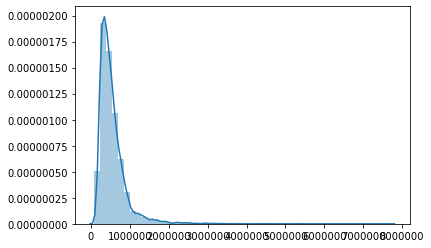

In [18]:
ut.plot(df,["price"])

In [19]:
df=df[(df['price'] < 12000000) & (df['price'] >100000)] # limiting my price range

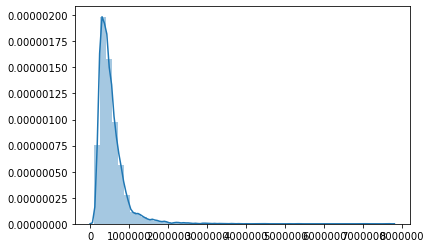

In [20]:
ut.plot(df,["price"])

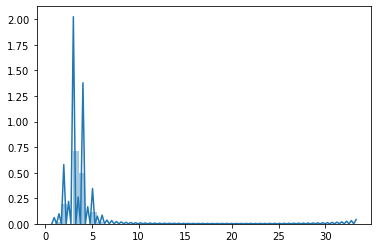

In [21]:
ut.plot(df,["bedrooms"])

In [22]:
df=df[(df['bedrooms'] < 6)] # remove the outlier

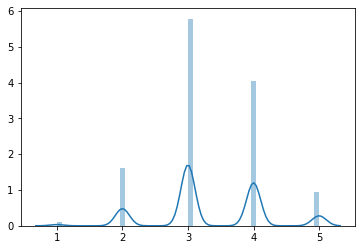

In [23]:
ut.plot(df,["bedrooms"])

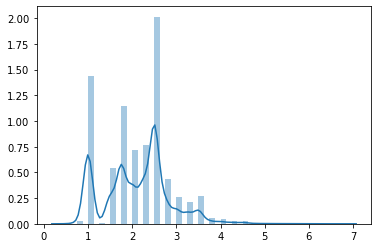

In [24]:
ut.plot(df,["bathrooms"])

In [25]:
df=df[(df['bathrooms'] < 4.5)] # remove the outlier

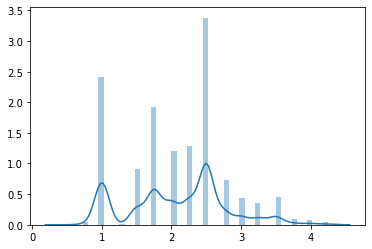

In [26]:
ut.plot(df,["bathrooms"])

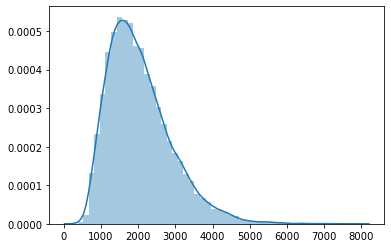

In [27]:
ut.plot(df,["sqft_living"])

In [28]:
df=df[(df['sqft_living'] < 3500)]

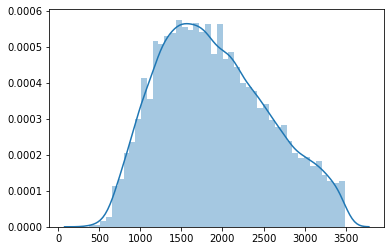

In [29]:
ut.plot(df,["sqft_living"])

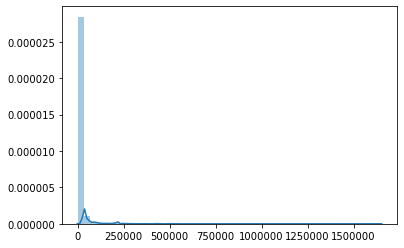

In [30]:
ut.plot(df,["sqft_lot"])

In [31]:
df=df[(df['sqft_lot'] < 20000)]

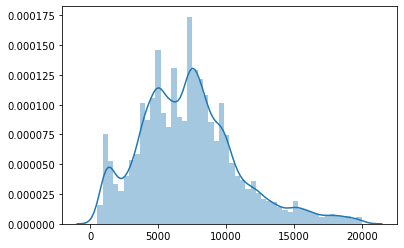

In [32]:
ut.plot(df,["sqft_lot"])

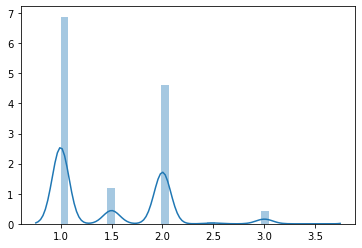

In [33]:
ut.plot(df,["floors"])

In [34]:
df=df[(df['floors'] < 3.5)]

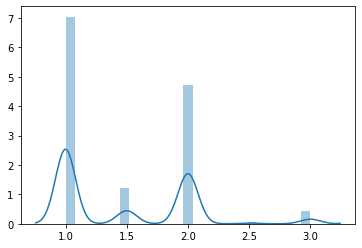

In [35]:
ut.plot(df,["floors"])

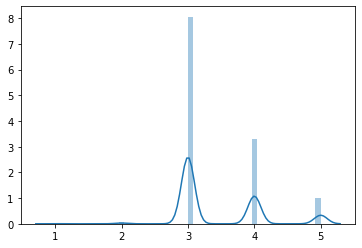

In [36]:
ut.plot(df,["condition"])

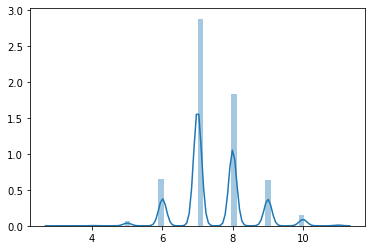

In [37]:
ut.plot(df,["grade"])

In [38]:
df["grade"].unique()

array([ 7,  6,  8,  9, 10,  5,  4, 11,  3])

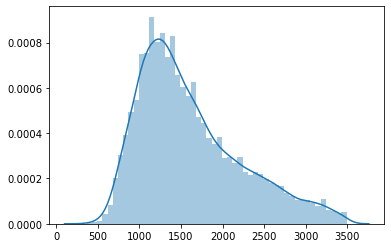

In [39]:
ut.plot(df,["sqft_above"])

In [40]:
df["sqft_above"].value_counts().sort_values(ascending=True)

2145      1
1867      1
1899      1
2093      1
2253      1
       ... 
1140    170
1220    179
1200    192
1300    196
1010    200
Name: sqft_above, Length: 658, dtype: int64

In [41]:
df=df[(df['sqft_above'] <2900)]

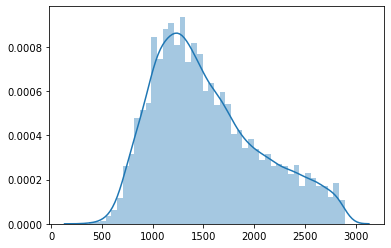

In [42]:
ut.plot(df,["sqft_above"])

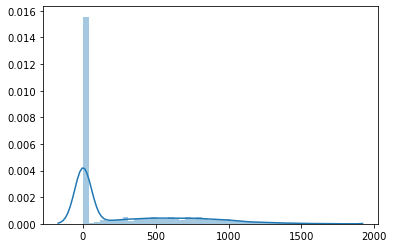

In [43]:
ut.plot(df,["sqft_basement"])

In [44]:
df["sqft_basement"].value_counts().sort_values(ascending=True)

20.0          1
65.0          1
415.0         1
875.0         1
906.0         1
861.0         1
652.0         1
602.0         1
248.0         1
172.0         1
295.0         1
225.0         1
792.0         1
1525.0        1
243.0         1
1750.0        1
276.0         1
1630.0        1
283.0         1
143.0         1
784.0         1
274.0         1
1135.0        1
176.0         1
1710.0        1
516.0         1
518.0         1
556.0         1
1730.0        1
266.0         1
862.0         1
506.0         1
704.0         1
508.0         1
207.0         1
1620.0        1
1660.0        2
1700.0        2
1720.0        2
1570.0        2
515.0         2
414.0         2
235.0         2
1520.0        2
1560.0        2
435.0         2
1680.0        2
10.0          2
1530.0        2
1690.0        2
1490.0        3
265.0         3
1610.0        3
40.0          4
1600.0        4
1480.0        4
1550.0        4
1310.0        5
1540.0        5
1470.0        5
145.0         5
1510.0        5
1590.0  

In [45]:
df=df[(df['sqft_basement'] < 1200)]

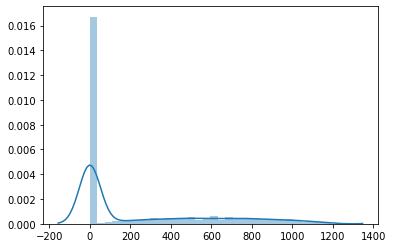

In [46]:
ut.plot(df,["sqft_basement"])

In [47]:
df["yr_built"].value_counts().sort_values(ascending=True)

1935     16
1934     16
1933     18
1902     25
1901     25
2015     27
1932     27
1936     32
1938     39
1904     43
1903     44
1913     47
1914     50
1931     50
1917     51
1937     54
1915     55
1907     57
1911     64
1905     64
1921     68
1916     71
1912     71
1982     73
1900     74
1923     76
1930     77
1908     78
1919     80
1971     83
1945     84
1906     84
1922     85
1909     87
1920     91
1939     92
1970     93
1995    102
1927    104
1973    105
2011    107
1929    108
1918    108
1997    112
1972    115
1928    115
1946    115
2010    116
1996    121
1910    122
1974    123
1924    127
2000    128
1964    128
1991    129
2012    133
1944    135
1992    136
1940    140
1993    141
1965    142
2013    142
1941    147
1925    148
1975    149
1980    151
1981    151
1998    153
1943    155
1983    155
2002    156
1986    157
1985    159
1984    161
1957    163
1958    166
1949    167
1926    170
1976    176
1956    178
1994    180
1988    181
1999    182
1953

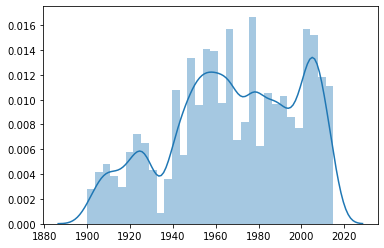

In [48]:
ut.plot(df,["yr_built"])

In [49]:
df["yr_renovated"].value_counts().sort_values(ascending=True)

1944.0        1
1946.0        1
1951.0        1
1971.0        1
1976.0        1
1962.0        1
1948.0        1
1957.0        1
1934.0        1
1950.0        1
1953.0        1
1959.0        1
1960.0        2
1940.0        2
1974.0        2
1981.0        2
1955.0        2
1972.0        2
1956.0        2
1967.0        2
1963.0        3
1978.0        3
1945.0        3
1969.0        3
1975.0        3
1965.0        3
1973.0        3
1958.0        3
1977.0        4
1982.0        4
1968.0        4
1964.0        4
1979.0        5
1980.0        6
1995.0        6
1970.0        7
2012.0        7
1992.0        7
2015.0        7
1987.0        8
1996.0        8
1998.0        8
1999.0        8
1994.0        9
2011.0        9
2010.0        9
1986.0        9
1985.0        9
1988.0       10
1997.0       10
2001.0       10
1993.0       10
1990.0       10
2002.0       11
2008.0       11
1984.0       12
1991.0       12
1983.0       13
1989.0       13
2006.0       15
2007.0       16
2009.0       16
2004.0  

In [50]:
df["renovated"]= df["yr_renovated"].apply(lambda x:1 if x!=0 else 0) 
# assign the value in the "yr_renovated" columns to binary value if it is renovated or not,then drop "yr_renovated"

In [51]:
df["renovated"].value_counts()

0    16157
1      523
Name: renovated, dtype: int64

In [52]:
df = df.drop(["yr_renovated"],axis =1) # drop "yr_renovated"

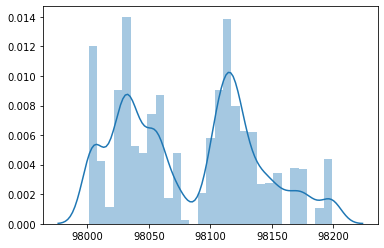

In [53]:
ut.plot(df,["zipcode"])

In [54]:
df["zipcode"].value_counts()

98103    573
98115    542
98117    524
98133    467
98118    466
98034    464
98038    450
98023    426
98052    414
98042    407
98155    390
98125    371
98058    357
98126    341
98056    335
98106    315
98144    308
98116    305
98059    302
98033    297
98001    293
98122    272
98006    271
98074    266
98146    262
98029    258
98199    255
98107    253
98003    248
98198    244
98031    242
98136    242
98178    240
98092    236
98055    235
98168    233
98030    228
98008    227
98028    226
98027    211
98112    208
98065    199
98166    195
98053    193
98105    188
98002    186
98177    184
98108    173
98004    168
98119    168
98011    158
98022    145
98072    139
98045    137
98040    134
98019    128
98188    118
98075    111
98007    106
98032    106
98109     99
98005     99
98102     90
98148     54
98010     50
98014     50
98077     29
98070     28
98024     25
98039     16
Name: zipcode, dtype: int64

In [55]:
df["zipcode"].nunique()

70

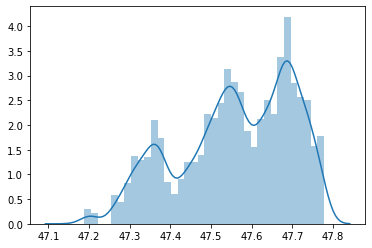

In [56]:
ut.plot(df,["lat"])

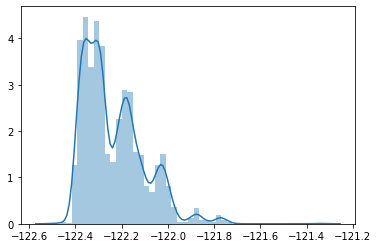

In [57]:
ut.plot(df,["long"])

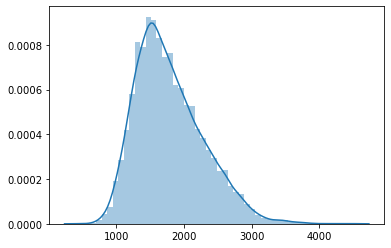

In [58]:
ut.plot(df,["sqft_living15"])

In [59]:
df=df[(df['sqft_living15'] < 3400)]

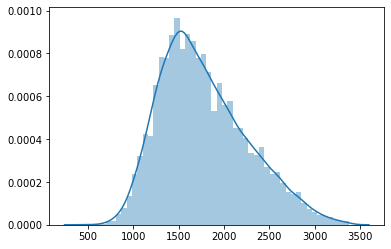

In [60]:
ut.plot(df,["sqft_living15"])

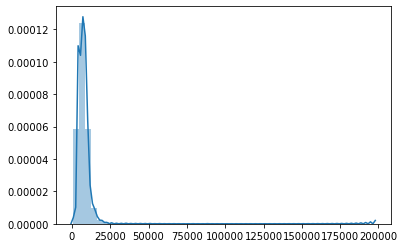

In [61]:
ut.plot(df,["sqft_lot15"])

In [62]:
df=df[(df['sqft_lot15'] < 8000)]

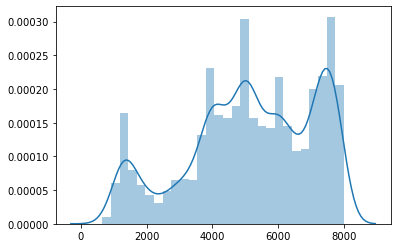

In [63]:
ut.plot(df,["sqft_lot15"])

## Explore the data

In [64]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
price,10615.0,466671.315780,216900.537346,102500.0000,315000.0000,425000.000,565998.5000,2.580000e+06
bedrooms,10615.0,3.123787,0.812062,1.0000,3.0000,3.000,4.0000,5.000000e+00
bathrooms,10615.0,1.976613,0.687662,0.5000,1.5000,2.000,2.5000,4.250000e+00
sqft_living,10615.0,1731.258691,578.651917,370.0000,1290.0000,1670.000,2130.0000,3.490000e+03
sqft_lot,10615.0,5256.174282,2385.108910,520.0000,3800.0000,5120.000,7000.0000,1.996900e+04
floors,10615.0,1.558502,0.569932,1.0000,1.0000,1.500,2.0000,3.000000e+00
waterfront,10615.0,0.000565,0.023769,0.0000,0.0000,0.000,0.0000,1.000000e+00
condition,10615.0,3.373811,0.652048,1.0000,3.0000,3.000,4.0000,5.000000e+00
grade,10615.0,7.346302,0.878366,4.0000,7.0000,7.000,8.0000,1.100000e+01
sqft_above,10615.0,1503.797833,537.862567,370.0000,1080.0000,1400.000,1850.0000,2.890000e+03


In [65]:
df.shape # after cleaning, now the dataset consist of 10615 rows and 18 columns

(10615, 18)

In [66]:
df.info() # sanity check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10615 entries, 0 to 21596
Data columns (total 18 columns):
price            10615 non-null float64
bedrooms         10615 non-null int64
bathrooms        10615 non-null float64
sqft_living      10615 non-null int64
sqft_lot         10615 non-null int64
floors           10615 non-null float64
waterfront       10615 non-null int64
condition        10615 non-null int64
grade            10615 non-null int64
sqft_above       10615 non-null int64
sqft_basement    10615 non-null float64
yr_built         10615 non-null int64
zipcode          10615 non-null int64
lat              10615 non-null float64
long             10615 non-null float64
sqft_living15    10615 non-null int64
sqft_lot15       10615 non-null int64
renovated        10615 non-null int64
dtypes: float64(6), int64(12)
memory usage: 1.5 MB


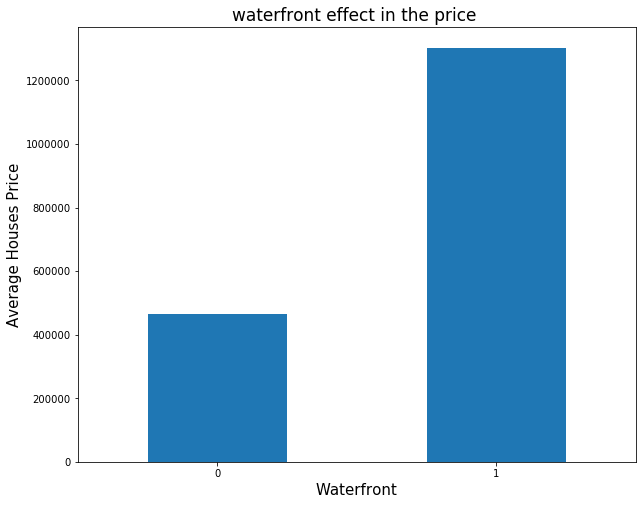

In [67]:
# plotting houses to the mean of price
df.groupby("waterfront")["price"].mean().plot(kind="bar",figsize=(10,8));
plt.title("waterfront effect in the price ", fontsize=17)
plt.ylabel("Average Houses Price",fontsize=15)
plt.xlabel("Waterfront",fontsize=15)
plt.xticks(rotation=0)
plt.show()
#the houses with waterfront selling price are higher than one without waterfront

(array([0, 1]), <a list of 2 Text xticklabel objects>)

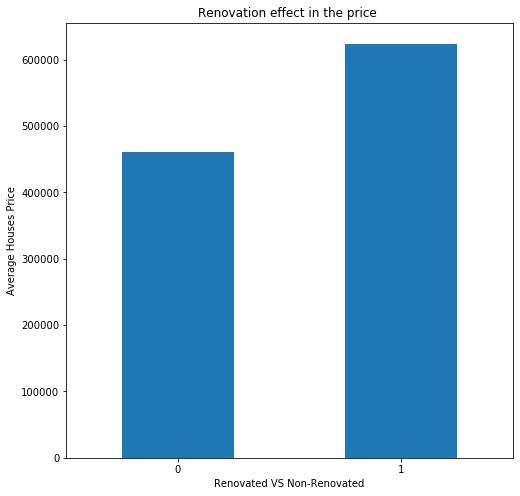

In [68]:
# plotting houses to the mean of price
df.groupby("renovated")["price"].mean().plot(kind="bar",figsize=(8,8));
plt.title("Renovation effect in the price ")
plt.ylabel("Average Houses Price")
plt.xlabel("Renovated VS Non-Renovated")
plt.xticks(rotation=0)
#the renovated houses selling price is higher than non-renovated one 

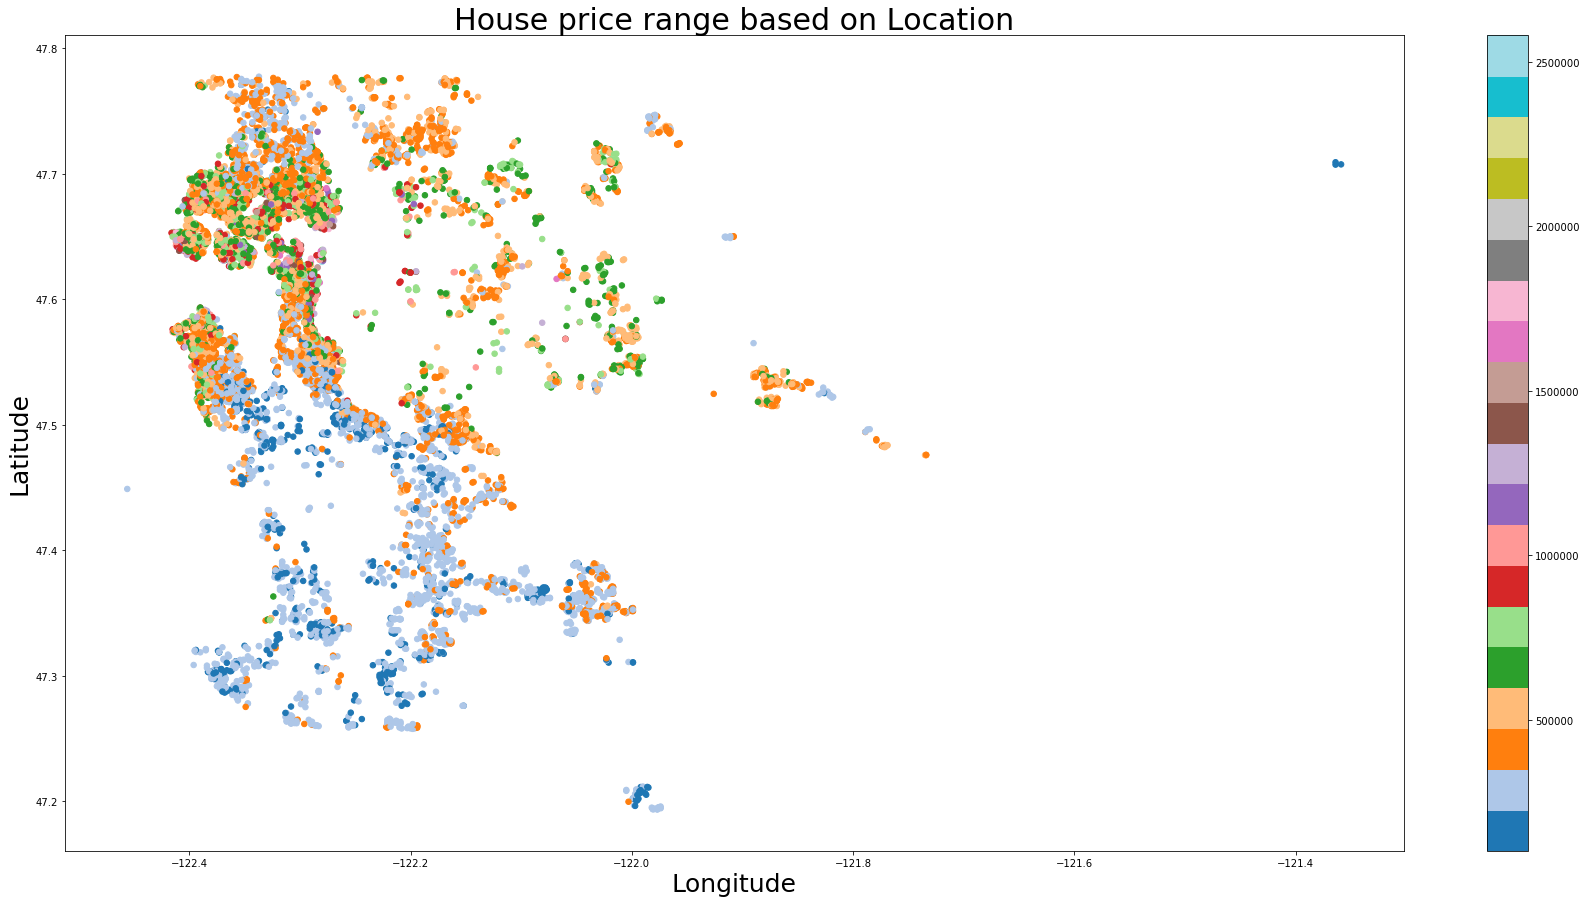

In [69]:
# Visualizing Longitude to Latitude to check how the price vary by location
plt.figure(figsize= (30, 15))
plt.scatter(x=df['long'], y=df['lat'], c=df['price'], cmap='tab20', marker='o',s=30)
plt.title('House price range based on Location',fontsize=30)
plt.xlabel('Longitude',fontsize=25)
plt.ylabel('Latitude',fontsize=25)
plt.colorbar()
plt.show;

In [70]:
# #visualize relationships between numeric columns
#sns.pairplot(df)

In [71]:
df.corr() # check for multicollinearity between other variables

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
price,1.000000,0.217521,0.317398,0.524076,-0.121710,0.200429,0.091737,0.111256,0.545136,0.367155,0.307881,-0.148666,0.182910,0.449232,-0.147646,0.390753,-0.150082,0.135027
bedrooms,0.217521,1.000000,0.459538,0.620795,0.196718,0.161048,-0.013388,0.030927,0.273676,0.513461,0.241146,0.122999,-0.157813,-0.126219,0.150634,0.374412,0.187530,0.018854
bathrooms,0.317398,0.459538,1.000000,0.674968,-0.135715,0.545188,0.013778,-0.139824,0.578527,0.611607,0.179640,0.546293,-0.240871,-0.090225,0.267481,0.473042,-0.148948,0.034931
sqft_living,0.524076,0.620795,0.674968,1.000000,0.144007,0.317505,0.020841,-0.024643,0.596887,0.821877,0.398600,0.251041,-0.174772,-0.057829,0.236029,0.670969,0.121196,0.054396
sqft_lot,-0.121710,0.196718,-0.135715,0.144007,1.000000,-0.460450,-0.008168,0.129508,-0.163530,0.117604,0.058932,-0.168738,-0.173527,-0.216380,0.164471,0.147843,0.824229,-0.000545
floors,0.200429,0.161048,0.545188,0.317505,-0.460450,1.000000,0.014946,-0.268896,0.500605,0.511201,-0.267215,0.541077,-0.118175,0.007585,0.145409,0.241927,-0.485805,-0.015384
waterfront,0.091737,-0.013388,0.013778,0.020841,-0.008168,0.014946,1.000000,0.004603,0.017699,0.017592,0.008197,-0.000335,-0.000965,0.005122,0.022366,0.032750,-0.002159,-0.004417
condition,0.111256,0.030927,-0.139824,-0.024643,0.129508,-0.268896,0.004603,1.000000,-0.174391,-0.170839,0.225137,-0.403230,0.071153,0.048593,-0.138204,-0.111025,0.144166,-0.059009
grade,0.545136,0.273676,0.578527,0.596887,-0.163530,0.500605,0.017699,-0.174391,1.000000,0.595586,0.073305,0.438881,-0.102946,0.078070,0.120321,0.518422,-0.168457,0.028321
sqft_above,0.367155,0.513461,0.611607,0.821877,0.117604,0.511201,0.017592,-0.170839,0.595586,1.000000,-0.182957,0.412710,-0.325057,-0.152803,0.411672,0.672134,0.095849,0.010027


In [72]:
abs(df.corr()) > 0.75 #set 0.75 high correlation as a cut-off

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [73]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'renovated'],
      dtype='object')

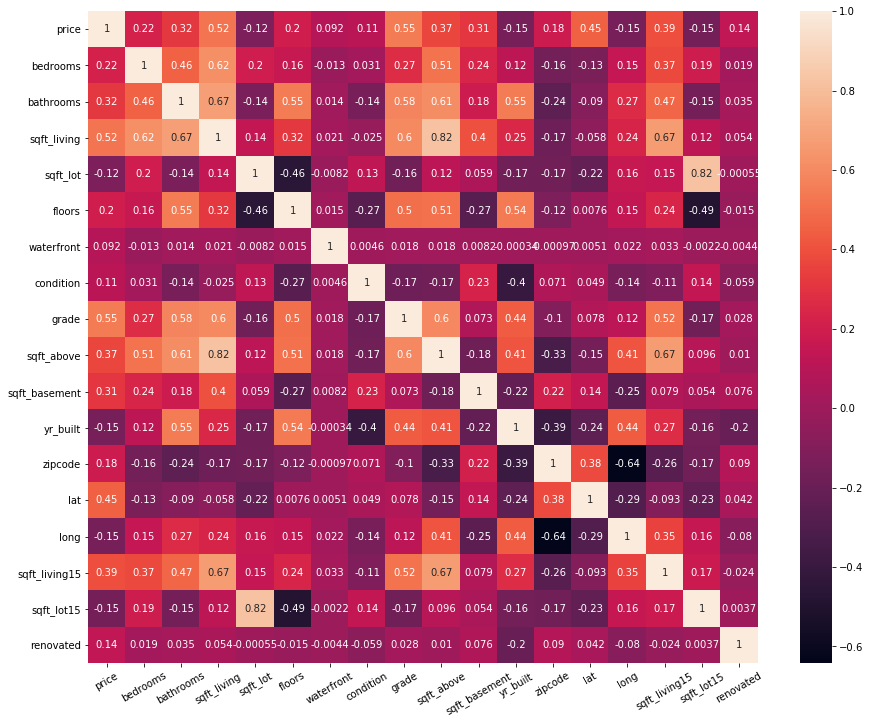

In [74]:
# visualize correlations between numeric columns to check if there is any multicollinearity between the variables
plt.figure(figsize=(15, 12))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_ylim(18,0)
plt.xticks(rotation=30)
plt.savefig("images/multicollinearity.png")
plt.show()

In [75]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df3=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df3['pairs'] = list(zip(df3.level_0, df3.level_1))

# set index to pairs
df3.set_index(['pairs'], inplace = True)

#d rop level columns
df3.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df3.columns = ['cc']

# drop duplicates.
df3.drop_duplicates(inplace=True)
df3.head()


,cc
pairs,
"(price, price)",1.000000
"(sqft_lot, sqft_lot15)",0.824229
"(sqft_above, sqft_living)",0.821877
"(sqft_living, bathrooms)",0.674968
"(sqft_above, sqft_living15)",0.672134


In [76]:
df3[(df3.cc>.75) & (df3.cc <1)] # assigning the range for unwanted   correlation

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.824229
"(sqft_above, sqft_living)",0.821877


In [77]:
df = df.drop(["sqft_lot15","sqft_above"],axis =1) 
# drop columns that cause high correlation so won't mess up my model
# for sqft_lot, sqft_lot15: i dropped sqft_lot15 because it makes more sense to drop The square footage of the 
#land lots of the nearest 15 neighbors
# for sqft_above, sqft_living: i dropped the sqft_above because the square footage of the house’s interior
#living space is more important than the qft_above basement

## Model

### Baseline Model


In [78]:
# set  X and y
X = df.drop('price', axis=1)
y = df['price']


In [79]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Instantiate a scaler
scaler = StandardScaler()

# train on train data
scaler.fit(X_train)
# transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [81]:
# Instantiate a linear regression model
lr = LinearRegression()
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [82]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [83]:
# Evaluate
ut.evaluate_model(y_train, y_test, y_train_pred, y_test_pred)

Train R2: 0.679
Test R2: 0.663
---
Train MAE: 88588.422
Test MAE: 89961.169
---
Train RMSE: 122558.346
Test RMSE: 126959.733


In [84]:
# the baseline model can predict 66 % variance in the price and approximately my model is $88,000 off (MAE), 
#and for root square error we have about $126000 off because root square error is bigger than MAE

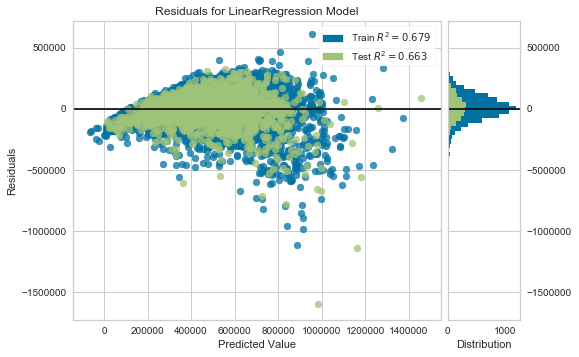

In [85]:
# visualizing our residuals
# https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()


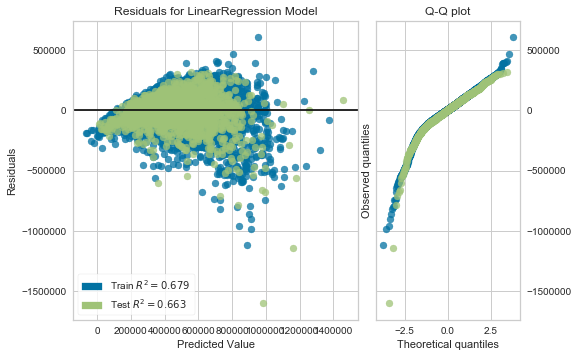

In [86]:
visualizer = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

In [87]:
# The predicted values of the baseline model are not equally scattered, has a cone shape, so it is heteroscedastic

In [88]:
# examine the relationship of each of the following feature against the price by using regplot

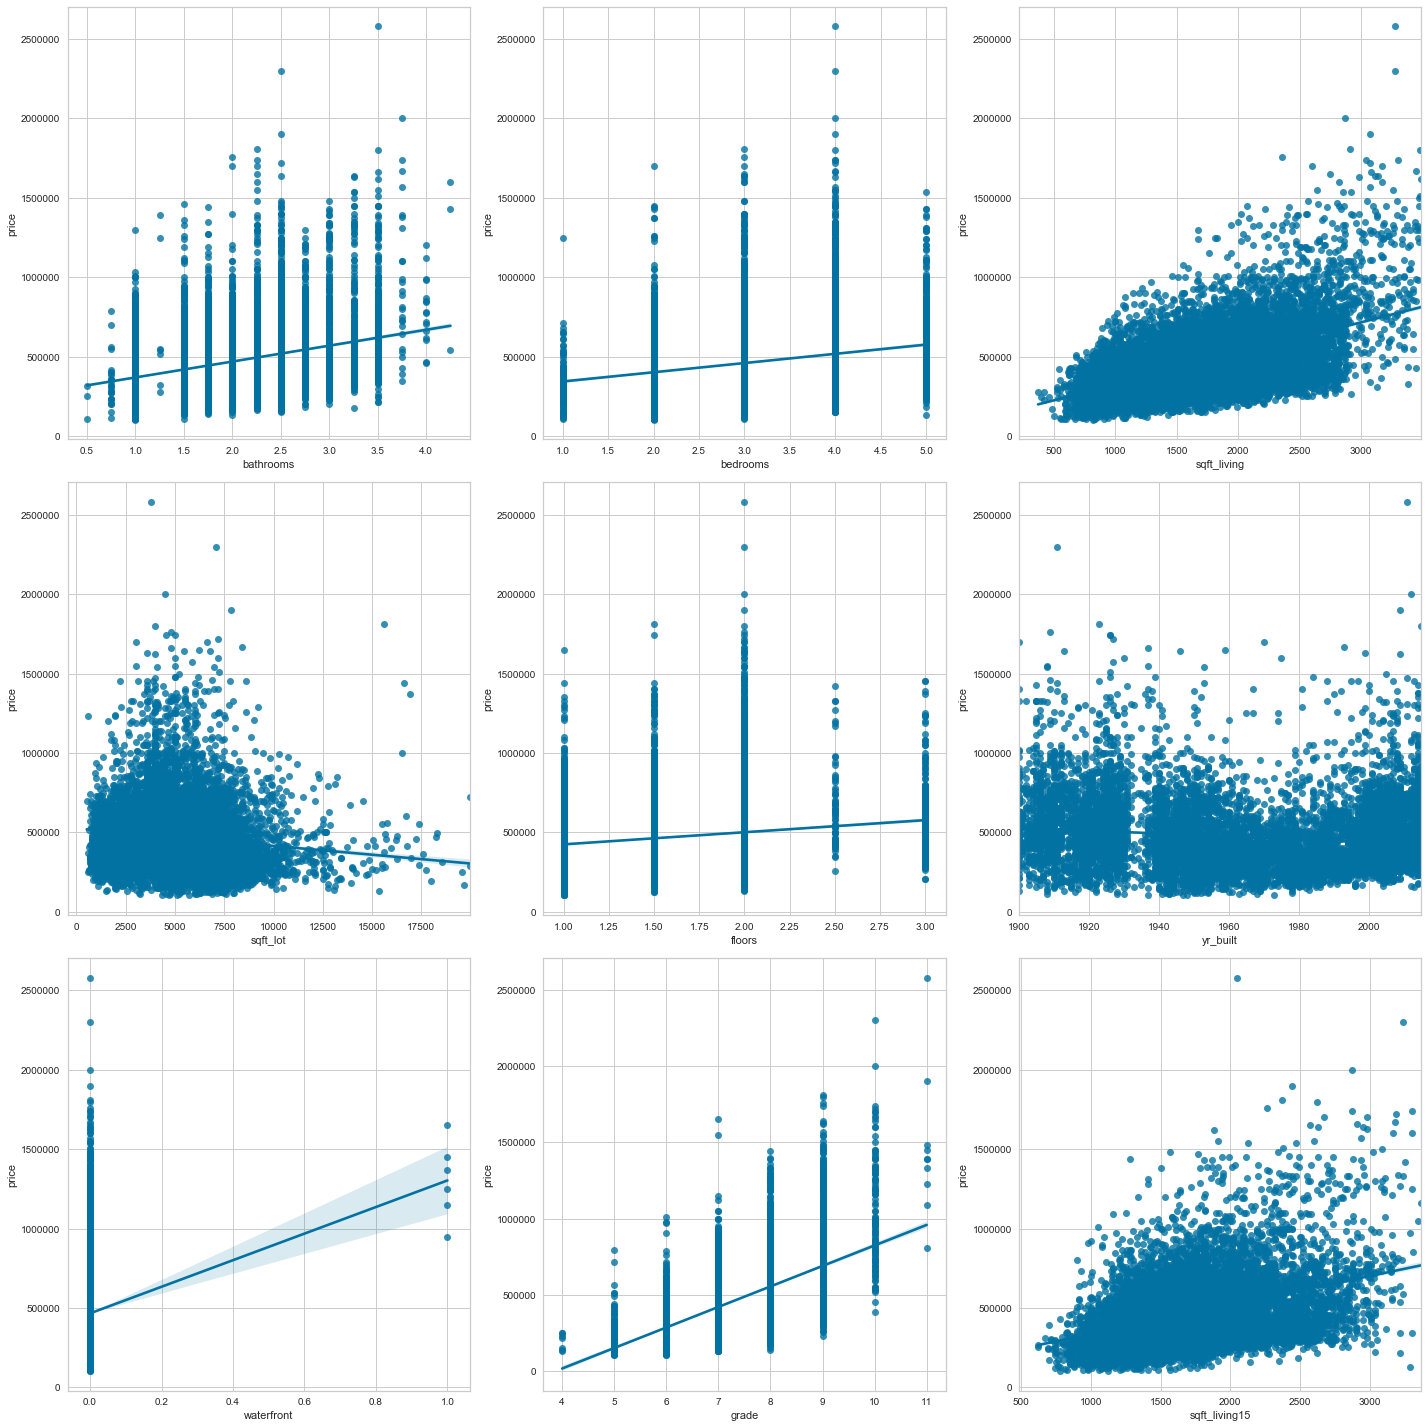

In [89]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = df['price'], x = X['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = X['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = X['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = X['sqft_lot'], ax = axs[1, 0])
sns.regplot(y = df['price'], x = X['floors'], ax = axs[1, 1])
sns.regplot(y = df['price'], x = X['yr_built'], ax = axs[1, 2])
sns.regplot(y = df['price'], x = X['waterfront'], ax = axs[2, 0])
sns.regplot(y = df['price'], x = X['grade'], ax = axs[2, 1])
sns.regplot(y = df['price'], x = X['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

In [90]:
# the best fit line is not clear in year built
# floors and sqft_lot are not linearly related to the price

# Second Model

In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
# copy of the original dataframe
df5 = df.copy()
X5 = df.drop('price', axis=1)
y5 = df['price']
# train test split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [93]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False)

In [94]:
# Fit and transform X_train
poly.fit(X_train5)
X_train_poly = poly.transform(X_train5)
X_test_poly = poly.transform(X_test5)

In [95]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform X_train_poly
scaler.fit(X_train_poly)

X_train_poly_sc = scaler.transform(X_train_poly)
X_test_poly_sc = scaler.transform(X_test_poly)

In [96]:
# Instantiate and fit a linear regression model to the polynomial transformed scaled train 
lr = LinearRegression()

lr.fit(X_train_poly_sc, y_train5)
# grab predictions for train and test set
y_train_poly_preds = lr.predict(X_train_poly_sc)
y_test_poly_preds = lr.predict(X_test_poly_sc)

In [97]:
# Evaluate
ut.evaluate_model(y_train5, y_test5, y_train_poly_preds, y_test_poly_preds)

Train R2: 0.765
Test R2: 0.755
---
Train MAE: 74712.715
Test MAE: 76022.552
---
Train RMSE: 104854.645
Test RMSE: 108245.612


In [98]:
# the second model can predecit 75 % variance in the price and approximatly $76,000 off(MAE), and $105,000(RMSE)

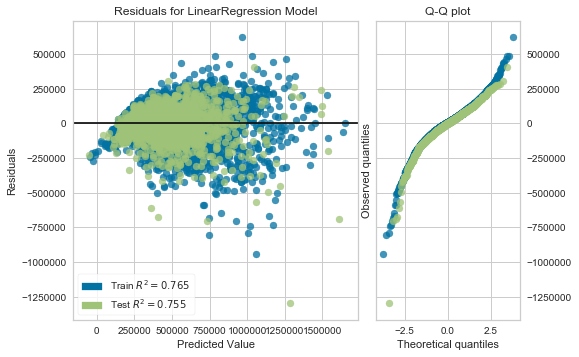

In [99]:
visualizer = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer.fit(X_train_poly_sc, y_train5)  # Fit the training data to the visualizer
visualizer.score(X_test_poly_sc, y_test5)  # Evaluate the model on the test data
visualizer.show()


In [100]:
# The predicted values of the second model are  better than the baseline model but still not equally scattered,
# has a cone shape, so it is heteroscedastic

In [101]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build step forward feature selection
sfs1 = sfs(lr,k_features = 15,forward=True,floating=False, scoring='r2',cv=5,n_jobs=-1,verbose=2)
# Perform SFFS
sfs1 = sfs1.fit(X_train_poly_sc, y_train5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    3.8s finished

[2021-01-31 18:04:25] Features: 1/15 -- score: 0.35447650309126344[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.2s finished

[2021-01-31 18:04:26] Features: 2/15 -- score: 0.5925090791190135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    1.2s finished

[2021-01-31 18:04:27] Features: 3/15 -- score: 0.6317727924083277[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 133 out 

In [102]:
# I used step forward feature selection to check if dropped any feature will make R2 better, but it didn't

# Third model

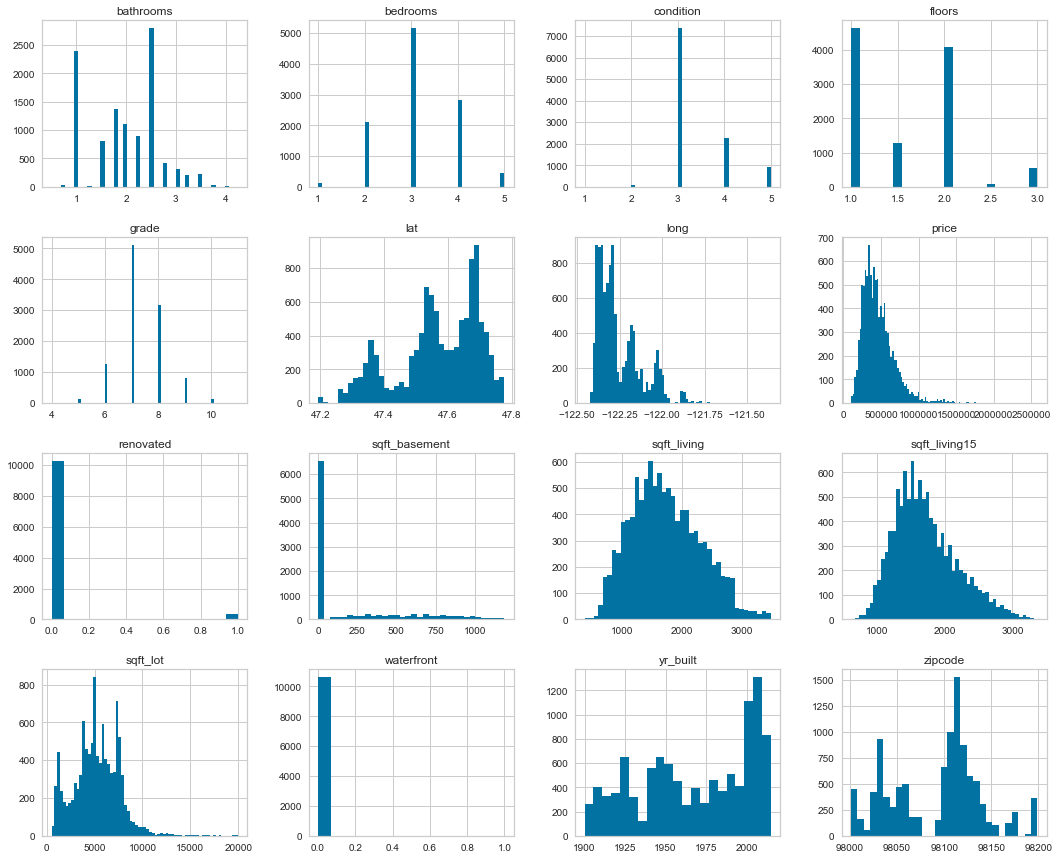

In [103]:
# check all variables shape of distribution by using histogram
fig = plt.figure(figsize = (18,15))
ax = fig.gca()
df.hist(ax = ax, bins='auto');

In [104]:
# price, sqft_living, sqft_living15, are all continuous and almost normally distributed.
# sqft_lot, lat, long are all continuous but not normally distributed
# the not renovated percentage is way higher than the renovated, same apply for waterfront
# bedrooms, bathrooms, floors, condition, grade,yr_built are all had ordinal values

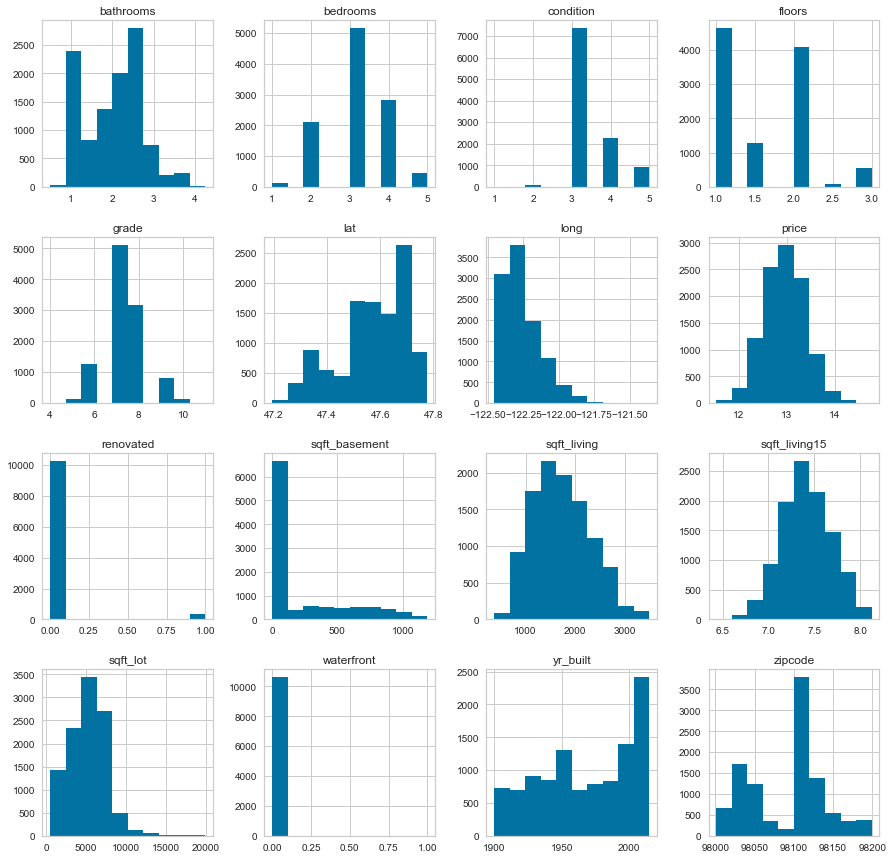

In [105]:
# Try log transform with every feature, but it only worked with the price and 'sqft_living15',
# now price and 'sqft_living15' distribution are way better
df4 = df.copy()
df4['price'] = np.log1p(df4['price'])
df4['sqft_living15'] = np.log1p(df4['sqft_living15'])
df4.hist(figsize  = [15, 15]);

In [106]:
# one hot encode zip code
df4["zipcode"] = pd.get_dummies(df4["zipcode"], columns="zipcode", drop_first=False)

In [107]:
#min max scale binary data
df4["waterfront"]=(df4["waterfront"] - min(df4["waterfront"])) /(max(df4["waterfront"]) - min(df4["waterfront"]))
df4["renovated"] = (df4["renovated"] - min(df4["renovated"])) / (max(df4["renovated"]) - min(df4["renovated"]))

In [108]:
X2 = df4.drop('price', axis=1)
y2 = df4['price']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Instantiate a linear regression model
lr2 = LinearRegression()
# Fit our model on our normalized data
lr2.fit(X_train2, y_train2)
y_train_pred2 = lr2.predict(X_train2)
y_test_pred2 = lr2.predict(X_test2)

In [109]:
# Evaluate
ut.evaluate_model(y_train2, y_test2, y_train_pred2, y_test_pred2)

Train R2: 0.727
Test R2: 0.721
---
Train MAE: 0.176
Test MAE: 0.177
---
Train RMSE: 0.227
Test RMSE: 0.224


In [110]:
# after log transformation, the model can predict 72 % variance in the price and approximately $0.17 off(MAE), 
# and $0.22(RMSE)

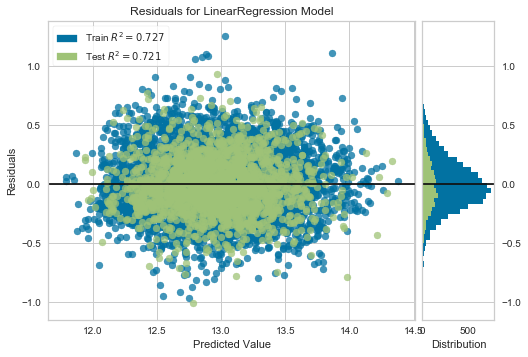

In [111]:
visualizer = ResidualsPlot(lr2)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
visualizer.show()



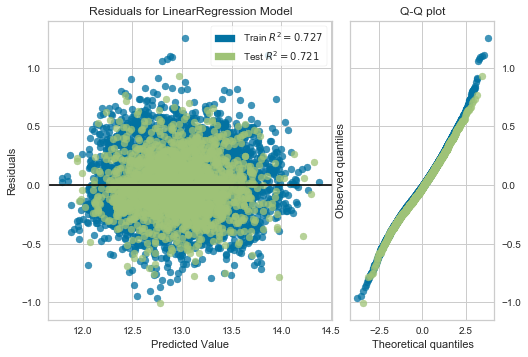

In [112]:
visualizer = ResidualsPlot(lr2, hist=False, qqplot=True)
visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
visualizer.show()


In [113]:
#The predicted values of the this model are equally scattered which achieve Homoscedasticity Assumption.



# Final model

In [114]:
X6 = df4.drop('price', axis=1)
y6 = df4['price']

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)


In [115]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train6)

# Instantiate and fit a linear regression model and normalize it to the polynomial transformed train features
reg_poly = LinearRegression(normalize=True).fit(X_poly_train, y_train6)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test6)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Transform the full data
X_poly = poly.transform(X_train6)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)


In [116]:
ut.evaluate_model(y_train6, y_test6, y_poly, y_pred)

Train R2: 0.768
Test R2: 0.761
---
Train MAE: 0.159
Test MAE: 0.160
---
Train RMSE: 0.209
Test RMSE: 0.208


In [117]:
#this model can predict 76 % variance in the price and approximately $0.16 off(MAE),and $0.20 0ff (RMSE) 
#not all the data have perfect linaer realthion with the price

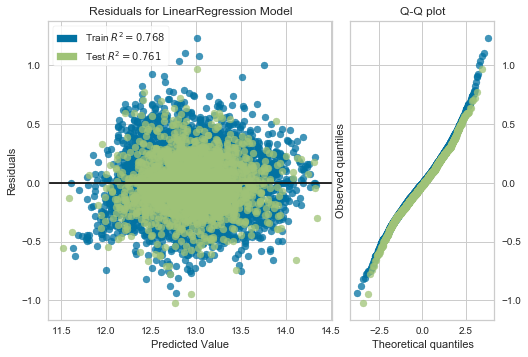

In [118]:
visualizer = ResidualsPlot(reg_poly, hist=False, qqplot=True)
visualizer.fit(X_poly_train, y_train6)  # Fit the training data to the visualizer
visualizer.score(X_poly_test, y_test6)  # Evaluate the model on the test data
visualizer.show()


In [119]:
#The predicted values of the this model are equally scattered which achieve Homoscedasticity Assumption.

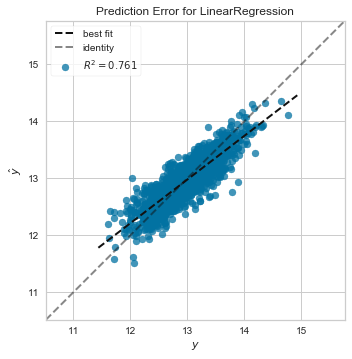

In [120]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(reg_poly, bestfit= True, is_fitted='auto') 
visualizer.fit(X_poly_train, y_train6) 
visualizer.score(X_poly_test, y_test6) 
visualizer.show()

In [121]:
# "The prediction error visualizer plots the actual (measured) vs. expected (predicted) values against each other.
#The dotted black line is the less than 45 degree line that indicates error approching zero"
# https://buildmedia.readthedocs.org/media/pdf/yellowbrick/develop/yellowbrick.pdf 

In [122]:
# look at the coefficients with the names of each col
pd.DataFrame.from_dict(dict(zip(X6, reg_poly.coef_)), orient='index')[0].sort_values(ascending= False)

long             2.335682e+02
sqft_living15    1.715476e+02
lat              5.693221e+01
sqft_living      2.053056e+01
bathrooms        1.838554e+01
renovated        1.535899e+01
grade            8.722950e+00
zipcode          1.426320e+00
condition        7.259106e-02
floors           1.000937e-02
bedrooms        -3.465028e-11
sqft_lot        -3.642458e-02
yr_built        -5.109342e-02
waterfront      -1.334060e+01
sqft_basement   -2.296149e+01
Name: 0, dtype: float64

In [123]:
#check for multicollinearity

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df8=df4.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df8['pairs'] = list(zip(df8.level_0, df8.level_1))

# set index to pairs
df8.set_index(['pairs'], inplace = True)

#d rop level columns
df8.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df8.columns = ['cc']

# drop duplicates.
df8.drop_duplicates(inplace=True)
df8.head()



,cc
pairs,
"(price, price)",1.000000
"(bathrooms, sqft_living)",0.674968
"(sqft_living15, sqft_living)",0.664560
"(bedrooms, sqft_living)",0.620795
"(grade, sqft_living)",0.596887


In [124]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train6)

# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly1 = LinearRegression().fit(X_poly_train, y_train6)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test6)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Transform the full data
X_poly = poly.transform(X_train6)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

In [125]:
# look at unscaled  coefficients with the names of each col
pd.DataFrame.from_dict(dict(zip(X6, reg_poly1.coef_)), orient='index')[0].sort_values(ascending= False)

long             233.568242
sqft_living15    171.547582
lat               56.930774
sqft_living       20.530556
bathrooms         18.385540
renovated         15.358990
grade              8.722950
zipcode            1.426320
floors             0.010009
condition          0.008259
bedrooms           0.000073
sqft_lot          -0.036425
yr_built          -0.051093
waterfront       -13.340602
sqft_basement    -22.961487
Name: 0, dtype: float64

## Interpret:

#### Feature Importances

Each positive coefficient of the model give the anticipated change in the sale, so for a one-unit increase in the independent variable A positive coefficient show a positive correlation relationship. 
As the feauture  increases, the price increases. While the negative coffient indicate that the  price decreases as the independent variable decreases


- From the above features' coefficient, we can see that the most strongest feature is longitude in the first place, and the latitude in the third place, which means that the price is highly correlated with the location of the house
- The square footage of interior housing living space for the nearest 15 neighbors come in the second place, and the square footage of living space in the 4th place, which means the living space of a house and the nearest 15 neighbors are also highly correlated with the price

## 1. Is there any relationship between the house’s location and its sale price?

The predicted price will increase with the increase in latitude and decrease in longitude and  as the location move to the  lower northwest with few scattered houses in the middle to east.
These will help the buyer to get an estimate of the housing price range based on the location, and their allocated budget.

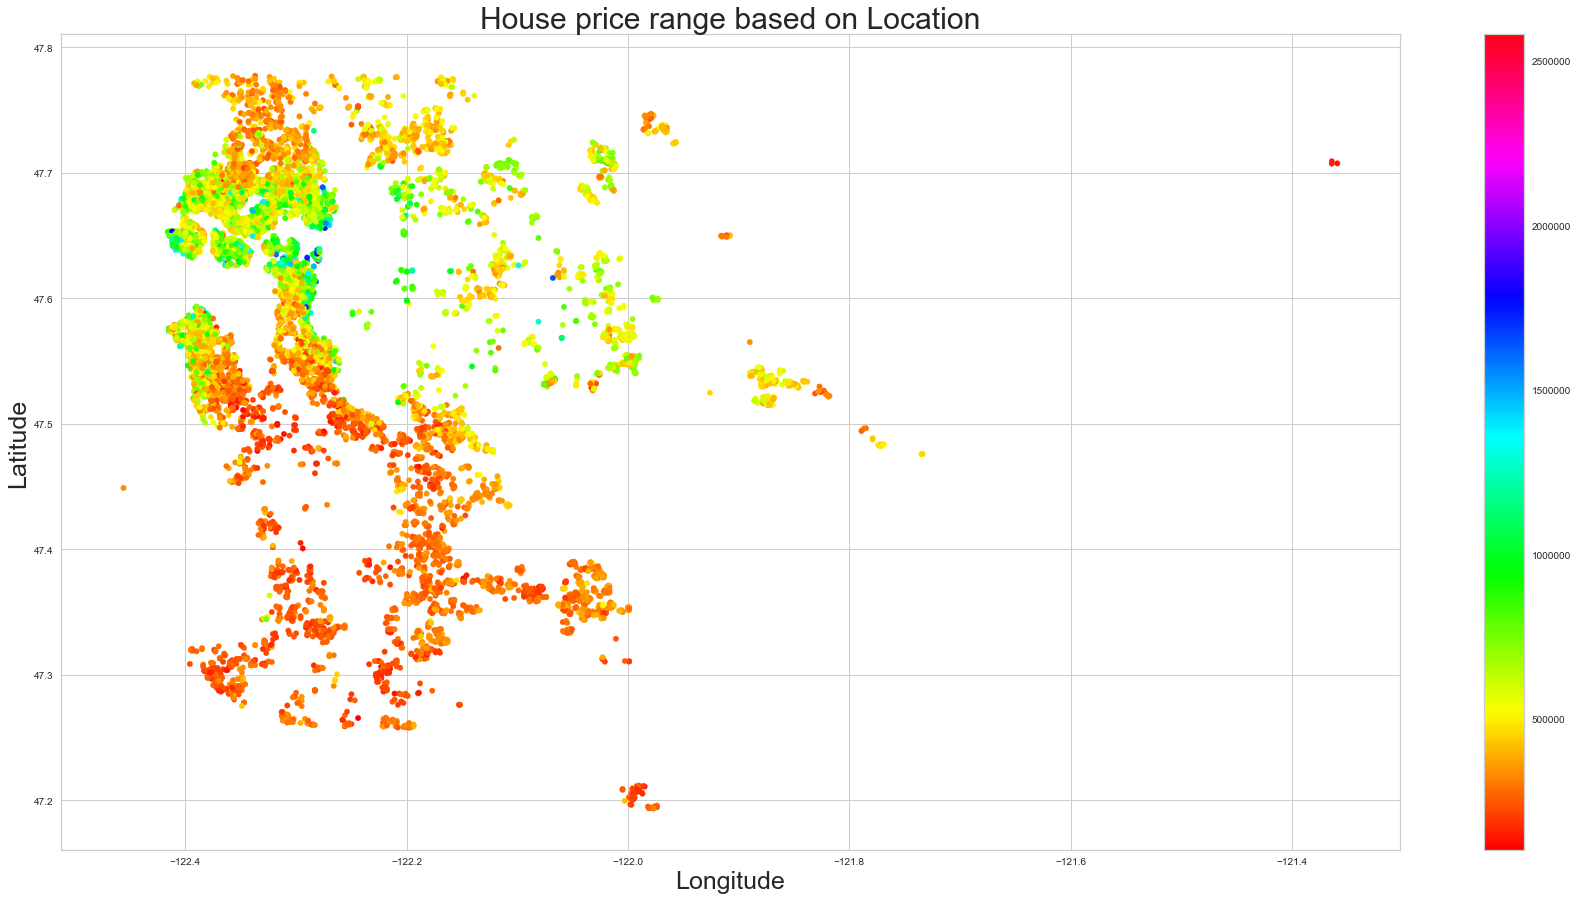

In [126]:
# Visualizing Longitude to Latitude to check how the price vary by location
plt.figure(figsize= (30, 15))
plt.scatter(x=df4['long'], y=df['lat'], c=df['price'], cmap='hsv', marker='o',s=30)
plt.title('House price range based on Location',fontsize=30)
plt.xlabel('Longitude',fontsize=25)
plt.ylabel('Latitude',fontsize=25)
plt.colorbar()
plt.savefig("images/House price based on Location.png")
plt.show;

## 2. What are the top ten zip codes that have the highest selling houses in King County?
 
After looking up the corresponding cities to each zip code, the top ten selling cities in terms of the price mean are Bellevue, Seattle, Mercer Island, Cottage Lake, Maltby, Union Hill-Novelty Hill, Sammamish.

In [127]:
# group by zipcode and get the mean of prices in a zipcode
top_ten= df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10).head(10)
top_ten.head(20)

zipcode
98004    876144.950000
98112    853475.984694
98109    790953.826531
98119    770200.748503
98040    765300.000000
98102    738225.533333
98105    730829.549451
98077    705000.000000
98075    678133.288462
98199    676242.224000
Name: price, dtype: float64

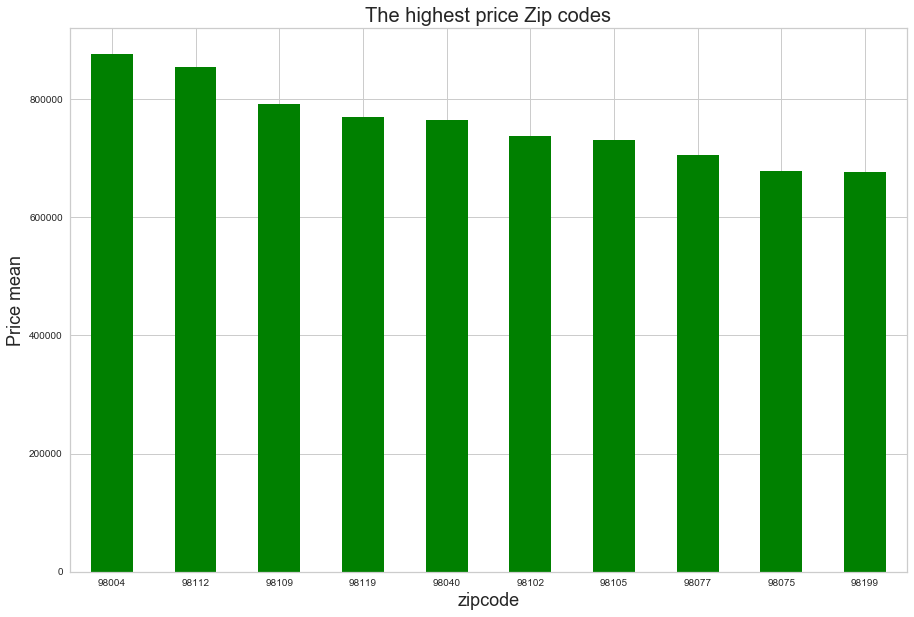

In [128]:
# plot top 10 highest house price as reported by zipcode
fig = top_ten.plot(kind = 'bar',color='green', figsize=(15,10))
plt.title('The highest price Zip codes',fontsize=20)
plt.xlabel('zipcode',fontsize=18)
plt.ylabel('Price mean',fontsize=18)
plt.xticks(rotation=0);
plt.savefig("images/The highest price zipcode.png")
plt.show()

## 3. What are the top ten affordable zip codes in King County?

After looking up the corresponding cities to each zip code, the most affordable cities in terms of the price mean are Tukwila, Auburn, Numclaw, Wabash, Birch, Krain, Cumberland, Bayne, Osceola, Maywood, Upper Mill, Bayne Junction, Boise, Veazie, Naco, Stampede,Kent, Lakeland North, Black Diamond, Franklin, and more

In [129]:
# group by zipcode and get the mean of prices in a zipcode
top_ten= df.groupby('zipcode')['price'].mean().sort_values(ascending=True).head(10).head(10)
top_ten.head(20)

zipcode
98168    223467.465753
98002    230126.106557
98022    238203.108696
98032    241732.434783
98010    244655.000000
98023    259564.941176
98198    261583.513274
98001    270265.829630
98014    270400.000000
98003    271748.489583
Name: price, dtype: float64

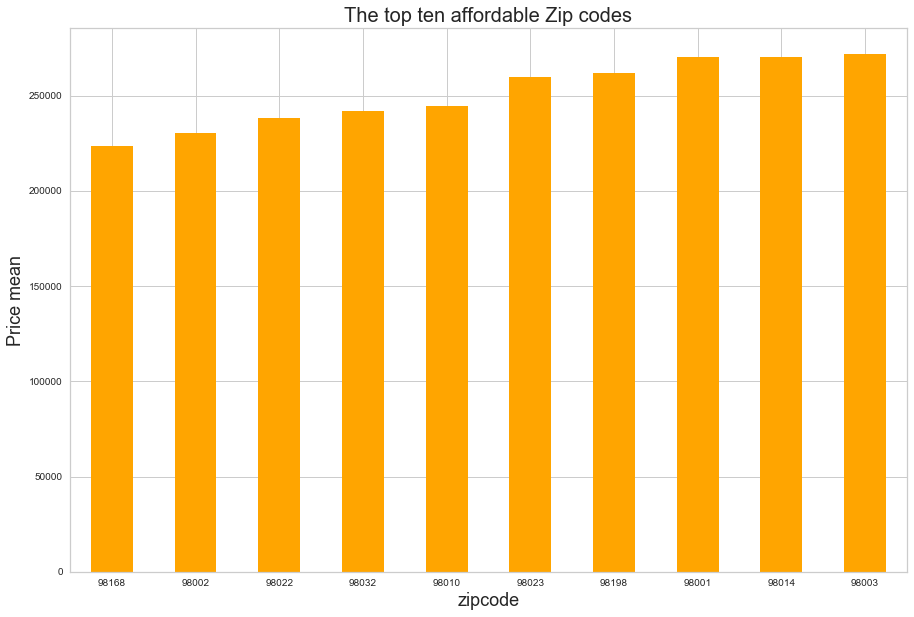

In [130]:
# plot top 10 lowest house price as reported by zipcode
fig = top_ten.plot(kind = 'bar',color='orange', figsize=(15,10))
plt.title('The top ten affordable Zip codes',fontsize=20)
plt.xlabel('zipcode',fontsize=18)
plt.ylabel('Price mean',fontsize=18)
plt.xticks(rotation=0);
plt.savefig("images/The top ten affordable zipcode.png")
plt.show()

## 4. Which features are important to predict the price of the house?
 

- The price of the house is highly affected by its location.
- Houses with larger living space, bigger basement, and more bathrooms have higher predicted price.
- The renovated houses selling price is higher than non-renovated one
- The houses with waterfront have higher selling prices than the ones without one.
- Each increase of the grade will increase the price of the house's price, with grade 11 in the top

<Figure size 1440x1440 with 0 Axes>

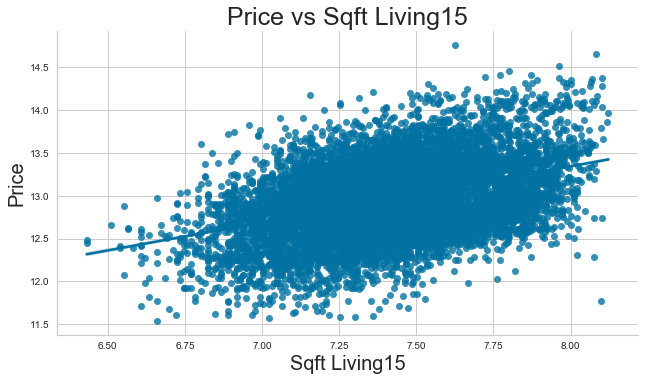

In [131]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="sqft_living15", y="price",aspect=1.8,data=df4)
plt.title("Price vs Sqft Living15",fontsize=25)
sqf.set_xlabels("Sqft Living15",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();


<Figure size 1440x1440 with 0 Axes>

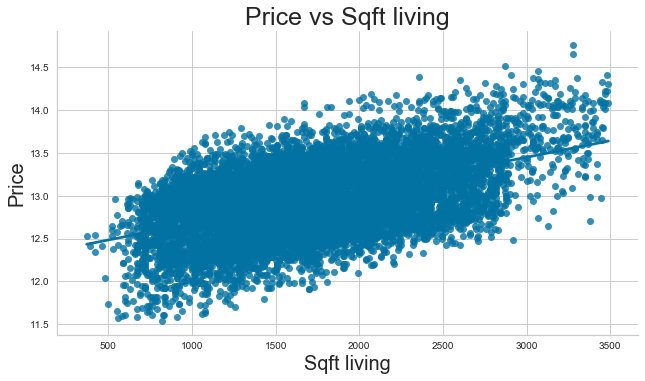

In [132]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="sqft_living", y="price",aspect=1.8,data=df4)
plt.title("Price vs Sqft living",fontsize=25)
sqf.set_xlabels("Sqft living",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();


<Figure size 1440x1440 with 0 Axes>

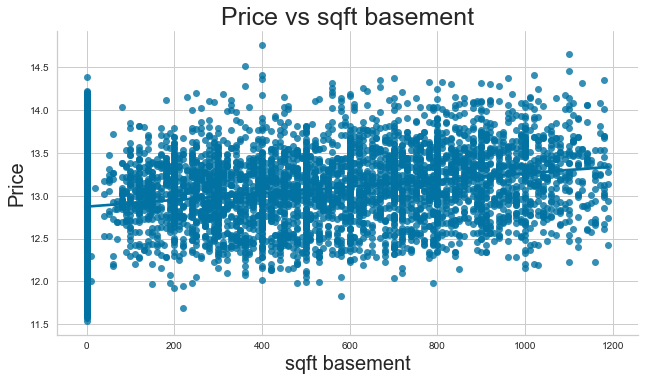

In [133]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="sqft_basement", y="price",aspect=1.8,data=df4)
plt.title("Price vs sqft basement",fontsize=25)
sqf.set_xlabels("sqft basement",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();


<Figure size 1440x1440 with 0 Axes>

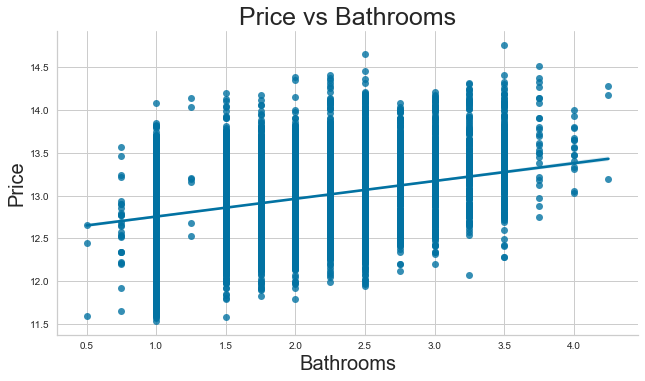

In [134]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="bathrooms", y="price",aspect=1.8,data=df4)
plt.title("Price vs Bathrooms",fontsize=25)
sqf.set_xlabels("Bathrooms",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();



(array([0, 1]), <a list of 2 Text xticklabel objects>)

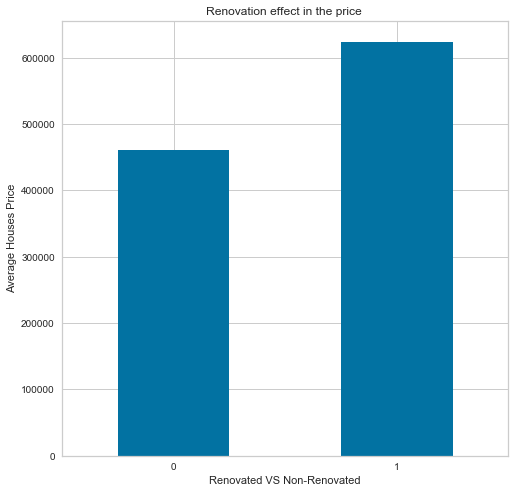

In [135]:
# plotting houses to the mean of price
df.groupby("renovated")["price"].mean().plot(kind="bar",figsize=(8,8));
plt.title("Renovation effect in the price ")
plt.ylabel("Average Houses Price")
plt.xlabel("Renovated VS Non-Renovated")
plt.xticks(rotation=0)
#the renovated houses selling price is higher than non-renovated one 

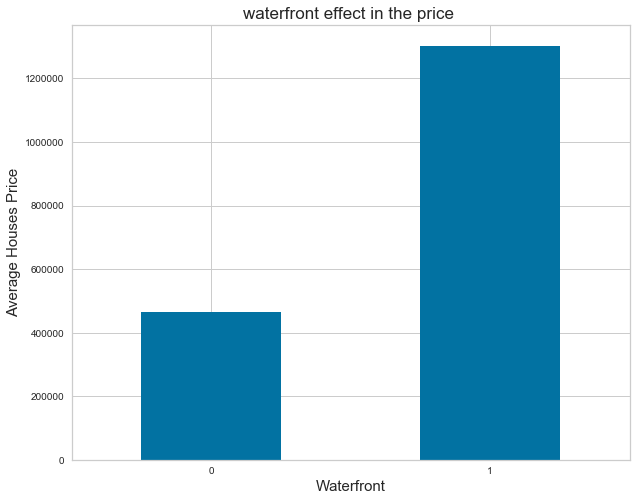

In [136]:
# plotting houses to the mean of price
df.groupby("waterfront")["price"].mean().plot(kind="bar",figsize=(10,8));
plt.title("waterfront effect in the price ", fontsize=17)
plt.ylabel("Average Houses Price",fontsize=15)
plt.xlabel("Waterfront",fontsize=15)
plt.xticks(rotation=0)
plt.show()
#the houses with waterfront selling price are higher than one without waterfront

<Figure size 1440x1440 with 0 Axes>

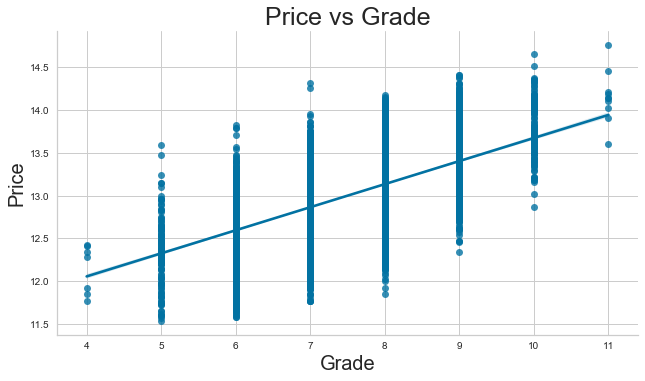

In [137]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="grade", y="price",aspect=1.8,data=df4)
plt.title("Price vs Grade",fontsize=25)
sqf.set_xlabels("Grade",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

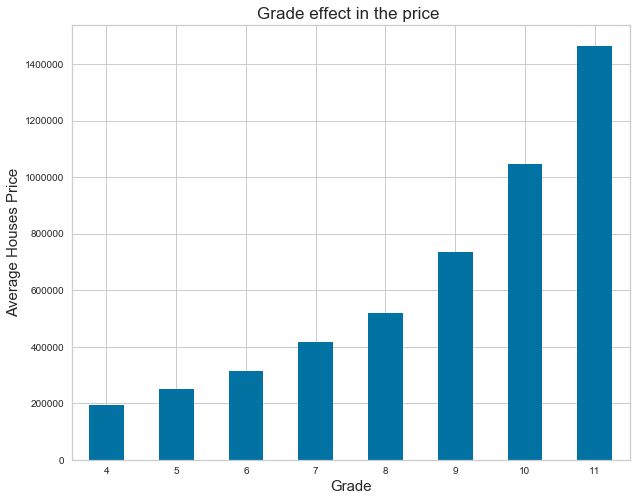

In [138]:
# plotting houses to the mean of price
df.groupby("grade")["price"].mean().plot(kind="bar",figsize=(10,8));
plt.title("Grade effect in the price ", fontsize=17)
plt.ylabel("Average Houses Price",fontsize=15)
plt.xlabel("Grade",fontsize=15)
plt.xticks(rotation=0)
plt.show()
#the houses with waterfront selling price are higher than one without waterfront

## Conclusions


- I  organized my notebook by using OSMEN data science method to deal with the king county dataset.

- I cleaned the data, removed the null values, limit each feature of the data to get rid of the outlier as much as possible, and checked for Multicollinearity.

- For the baseline model, I train test split the data using scikit-learn and scaled it using the standardized scaler, and got a R2 score of 0.66, for the Normality assumption the residuals were heteroscedastic.

- For the second model, I train test split the data using scikit-learn, Polynomial Regression, MinMaxScaler, and got a R2 score of 0.75, for Normality assumption the residuals were still heteroscedastic, I also used step forward feature selection to check if dropped any feature will make the R2 better, but it didn't.

- For the third model, I logged transform price and 'sqft_living15, one hot encode zip code, min-max scale binary data (waterfront and renovated). Train test split the data using sci-kit-learn, and got a R2 score of 0.72. For the normality assumption, the residuals were homoscedastic and the QQ plot looks good.

- For the Final mode, I copied the same data from the third model before test split, then train test split the data using scikit-learn, use polynomial regression, scaled it to be able to interpret the coefficients, and got a R2 score of 0.76, for the normality assumption the residuals were homoscedastic and the QQ plot looks good, checked for multicollinearity. after that unscaled it to be able to see how each unit of each features impacts the price.

- 15 features were included in the final model to get the best prediction, The following findings are from the features with the highest coefficients:
- The price of the house is highly affected by its location.
- Houses with larger living space, bigger basement, and more bathrooms have higher predicted price.
- The renovated houses selling price is higher than non-renovated one
- The houses with waterfront have higher selling prices than the ones without one.
- Each increase of the grade will increase the price, with grade 11 in the top

#### Limitaion

The size of the dataset,  a lot of features don't have a linear relationship with the target. Maybe a different non-linear model would work better.

#### Future work

Use APIs to get King county school district data and link it with the zip codes.
